# In this notebook, we run an MLP model on dataset hoda and examine the results in terms of underfitting, fitting and overfitting.

## Download dataset

In [14]:
!gdown --fuzzy https://drive.google.com/file/d/1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F
To: /content/dataset.py
100% 909/909 [00:00<00:00, 942kB/s]
Downloading...
From: https://drive.google.com/uc?id=1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi
To: /content/Data_hoda_full.mat
100% 3.99M/3.99M [00:00<00:00, 278MB/s]


## Importing libraries

In [15]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,  Activation
from dataset import load_hoda

# Load dataset

In [16]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

### Converting x_train and x_test to ndarray array format and converting y_train and y_test to one-hot-encoding:
####First, we have defined a simple function that prints the dimensions, data type and information of the loaded dataset. We will print this information before and after data preprocessing to notice the changes!

In [17]:
# Preprocess input data for Keras.
x_train = np.array(x_train_original)
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test_original)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [18]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [19]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [20]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [21]:
# In this Create the model, input dim=25 and output dim = 10

"""
Because the data is not complex, the model learns well with one layer.
For the activation function, ReLU is usually suitable for middle layers and it converges easily due to its high slope.
For the output layer, since we have multi-class classification, softmax is a suitable option.
"""

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


##################################
model = Sequential()
model.add(layers.Input(shape=(25)))
model.add(layers.Flatten())
model.add(layers.Dense(25000, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))
##################################


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 25000)             650000    
                                                                 
 dense_3 (Dense)             (None, 10)                250010    
                                                                 
Total params: 900010 (3.43 MB)
Trainable params: 900010 (3.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile model

In [23]:
# In this cell compile mode, set loss function and optimizer and get metrics accuracy

"""
Here we obtained the learning rate by trial and error.
"""

##################################
sgd_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
##################################

## Fit model

In [24]:
MLP_model = model.fit(x_train, y_train, epochs=18, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/18
16/16 [==============================] - 1s 32ms/step - loss: 1.0577 - accuracy: 0.7240 - val_loss: 0.4447 - val_accuracy: 0.8600
Epoch 2/18
16/16 [==============================] - 0s 21ms/step - loss: 0.3955 - accuracy: 0.8700 - val_loss: 0.3458 - val_accuracy: 0.8900
Epoch 3/18
16/16 [==============================] - 0s 22ms/step - loss: 0.2925 - accuracy: 0.8930 - val_loss: 0.3222 - val_accuracy: 0.8800
Epoch 4/18
16/16 [==============================] - 0s 23ms/step - loss: 0.2415 - accuracy: 0.9060 - val_loss: 0.2552 - val_accuracy: 0.9250
Epoch 5/18
16/16 [==============================] - 0s 21ms/step - loss: 0.2092 - accuracy: 0.9360 - val_loss: 0.2487 - val_accuracy: 0.9450
Epoch 6/18
16/16 [==============================] - 0s 22ms/step - loss: 0.1831 - accuracy: 0.9370 - val_loss: 0.2374 - val_accuracy: 0.9100
Epoch 7/18
16/16 [==============================] - 0s 20ms/step - loss: 0.1755 - accuracy: 0.9460 - val_loss: 0.2691 - val_accuracy: 0.9000
Epoch 8/18
16

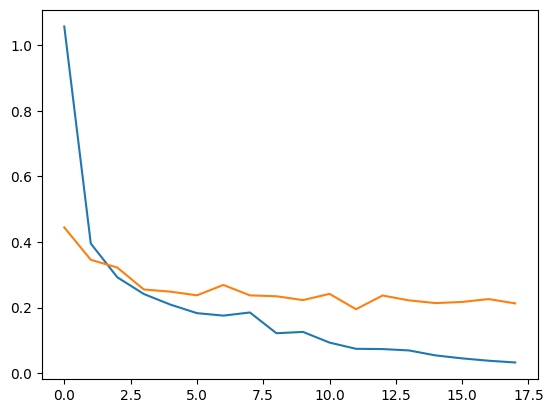

In [25]:
# plot Loss
plt.plot(MLP_model.history["loss"])
plt.plot(MLP_model.history["val_loss"])

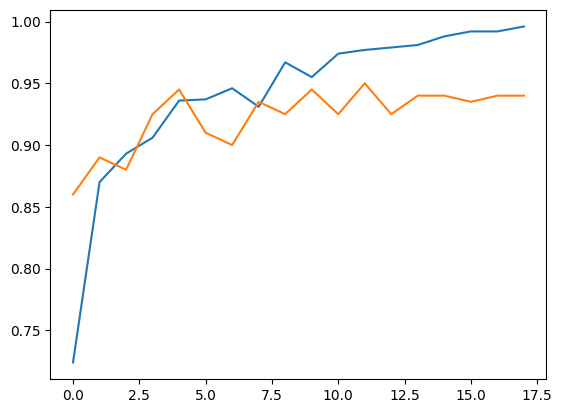

In [26]:
# plot accuracy
plt.plot(MLP_model.history["accuracy"])
plt.plot(MLP_model.history["val_accuracy"])